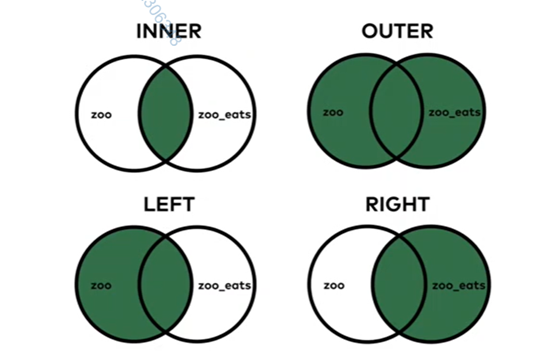

## merge合并（关系运算中的连接）

【例4-87】有同名属性内连接

In [1]:
import pandas as pd
zoo=pd.read_csv('Data/zoo.csv')
zoo

animal  uniq_id  water_need
0   elephant     1001         500
1   elephant     1002         600
2   elephant     1003         550
3      tiger     1004         300
4      tiger     1005         320
5      tiger     1006         330
6      tiger     1007         290
7      tiger     1008         310
8      zebra     1009         200
9      zebra     1010         220
10     zebra     1011         240
11     zebra     1012         230
12     zebra     1013         220
13     zebra     1014         100
14     zebra     1015          80
15      lion     1016         420
16      lion     1017         600
17      lion     1018         500
18      lion     1019         390
19  kangaroo     1020         410
20  kangaroo     1021         430
21  kangaroo     1022         410

In [2]:
zoo_eat=pd.read_csv('Data/zoo_eat.csv')
zoo_eat

animal        food
0  elephant  vegetables
1     tiger        meat
2  kangaroo  vegetables
3     zebra  vegetables
4   giraffe  vegetables

### inner连接（默认自然连接）

In [3]:
pd.merge(zoo,zoo_eat)
# 默认进行自然连接，也就是根据列名一样求数据的交集 inner 连接

animal  uniq_id  water_need        food
0   elephant     1001         500  vegetables
1   elephant     1002         600  vegetables
2   elephant     1003         550  vegetables
3      tiger     1004         300        meat
4      tiger     1005         320        meat
5      tiger     1006         330        meat
6      tiger     1007         290        meat
7      tiger     1008         310        meat
8      zebra     1009         200  vegetables
9      zebra     1010         220  vegetables
10     zebra     1011         240  vegetables
11     zebra     1012         230  vegetables
12     zebra     1013         220  vegetables
13     zebra     1014         100  vegetables
14     zebra     1015          80  vegetables
15  kangaroo     1020         410  vegetables
16  kangaroo     1021         430  vegetables
17  kangaroo     1022         410  vegetables

In [4]:
pd.merge(zoo,zoo_eat,on='animal',how='inner')

animal  uniq_id  water_need        food
0   elephant     1001         500  vegetables
1   elephant     1002         600  vegetables
2   elephant     1003         550  vegetables
3      tiger     1004         300        meat
4      tiger     1005         320        meat
5      tiger     1006         330        meat
6      tiger     1007         290        meat
7      tiger     1008         310        meat
8      zebra     1009         200  vegetables
9      zebra     1010         220  vegetables
10     zebra     1011         240  vegetables
11     zebra     1012         230  vegetables
12     zebra     1013         220  vegetables
13     zebra     1014         100  vegetables
14     zebra     1015          80  vegetables
15  kangaroo     1020         410  vegetables
16  kangaroo     1021         430  vegetables
17  kangaroo     1022         410  vegetables

【例4-88】指定列名的内连接

In [3]:
zoo_eat=pd.read_csv('Data/zoo_eat.csv')
zoo_eat.columns=['animals','food'] # 列名变得不同
zoo_eat

animals        food
0  elephant  vegetables
1     tiger        meat
2  kangaroo  vegetables
3     zebra  vegetables
4   giraffe  vegetables

In [6]:
pd.merge(zoo,zoo_eat)# 无公共列名，不能进行直接连接

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [4]:
pd.merge(zoo,zoo_eat,left_on='animal',right_on='animals',how='inner')

animal  uniq_id  water_need   animals        food
0   elephant     1001         500  elephant  vegetables
1   elephant     1002         600  elephant  vegetables
2   elephant     1003         550  elephant  vegetables
3      tiger     1004         300     tiger        meat
4      tiger     1005         320     tiger        meat
5      tiger     1006         330     tiger        meat
6      tiger     1007         290     tiger        meat
7      tiger     1008         310     tiger        meat
8      zebra     1009         200     zebra  vegetables
9      zebra     1010         220     zebra  vegetables
10     zebra     1011         240     zebra  vegetables
11     zebra     1012         230     zebra  vegetables
12     zebra     1013         220     zebra  vegetables
13     zebra     1014         100     zebra  vegetables
14     zebra     1015          80     zebra  vegetables
15  kangaroo     1020         410  kangaroo  vegetables
16  kangaroo     1021         430  kangaroo  vegetables
17  kangaroo     1022         410  kangaroo  vegetables

### 外连接

In [ ]:
【例4-89】外连接并设置填充值

In [9]:
pd.merge(zoo,zoo_eat,left_on='animal',right_on='animals',how='outer')

animal  uniq_id  water_need   animals        food
0   elephant   1001.0       500.0  elephant  vegetables
1   elephant   1002.0       600.0  elephant  vegetables
2   elephant   1003.0       550.0  elephant  vegetables
3      tiger   1004.0       300.0     tiger        meat
4      tiger   1005.0       320.0     tiger        meat
5      tiger   1006.0       330.0     tiger        meat
6      tiger   1007.0       290.0     tiger        meat
7      tiger   1008.0       310.0     tiger        meat
8      zebra   1009.0       200.0     zebra  vegetables
9      zebra   1010.0       220.0     zebra  vegetables
10     zebra   1011.0       240.0     zebra  vegetables
11     zebra   1012.0       230.0     zebra  vegetables
12     zebra   1013.0       220.0     zebra  vegetables
13     zebra   1014.0       100.0     zebra  vegetables
14     zebra   1015.0        80.0     zebra  vegetables
15      lion   1016.0       420.0       NaN         NaN
16      lion   1017.0       600.0       NaN         NaN
17      lion   1018.0       500.0       NaN         NaN
18      lion   1019.0       390.0       NaN         NaN
19  kangaroo   1020.0       410.0  kangaroo  vegetables
20  kangaroo   1021.0       430.0  kangaroo  vegetables
21  kangaroo   1022.0       410.0  kangaroo  vegetables
22       NaN      NaN         NaN   giraffe  vegetables

In [10]:
# 设置填充值
pd.merge(zoo,zoo_eat,left_on='animal',right_on='animals',how='outer').fillna('unknows')

animal  uniq_id water_need   animals        food
0   elephant     1001        500  elephant  vegetables
1   elephant     1002        600  elephant  vegetables
2   elephant     1003        550  elephant  vegetables
3      tiger     1004        300     tiger        meat
4      tiger     1005        320     tiger        meat
5      tiger     1006        330     tiger        meat
6      tiger     1007        290     tiger        meat
7      tiger     1008        310     tiger        meat
8      zebra     1009        200     zebra  vegetables
9      zebra     1010        220     zebra  vegetables
10     zebra     1011        240     zebra  vegetables
11     zebra     1012        230     zebra  vegetables
12     zebra     1013        220     zebra  vegetables
13     zebra     1014        100     zebra  vegetables
14     zebra     1015         80     zebra  vegetables
15      lion     1016        420   unknows     unknows
16      lion     1017        600   unknows     unknows
17      lion     1018        500   unknows     unknows
18      lion     1019        390   unknows     unknows
19  kangaroo     1020        410  kangaroo  vegetables
20  kangaroo     1021        430  kangaroo  vegetables
21  kangaroo     1022        410  kangaroo  vegetables
22   unknows  unknows    unknows   giraffe  vegetables

### 左外连接，保留左边的悬浮元祖

【例4-90】左外连接

In [11]:
pd.merge(zoo,zoo_eat,left_on='animal',right_on='animals',how='left')

animal  uniq_id  water_need   animals        food
0   elephant     1001         500  elephant  vegetables
1   elephant     1002         600  elephant  vegetables
2   elephant     1003         550  elephant  vegetables
3      tiger     1004         300     tiger        meat
4      tiger     1005         320     tiger        meat
5      tiger     1006         330     tiger        meat
6      tiger     1007         290     tiger        meat
7      tiger     1008         310     tiger        meat
8      zebra     1009         200     zebra  vegetables
9      zebra     1010         220     zebra  vegetables
10     zebra     1011         240     zebra  vegetables
11     zebra     1012         230     zebra  vegetables
12     zebra     1013         220     zebra  vegetables
13     zebra     1014         100     zebra  vegetables
14     zebra     1015          80     zebra  vegetables
15      lion     1016         420       NaN         NaN
16      lion     1017         600       NaN         NaN
17      lion     1018         500       NaN         NaN
18      lion     1019         390       NaN         NaN
19  kangaroo     1020         410  kangaroo  vegetables
20  kangaroo     1021         430  kangaroo  vegetables
21  kangaroo     1022         410  kangaroo  vegetables

### 右外连接，保留右面的悬浮元祖

【例4-91】右外连接

In [12]:
pd.merge(zoo,zoo_eat,left_on='animal',right_on='animals',how='right')

animal  uniq_id  water_need   animals        food
0   elephant   1001.0       500.0  elephant  vegetables
1   elephant   1002.0       600.0  elephant  vegetables
2   elephant   1003.0       550.0  elephant  vegetables
3      tiger   1004.0       300.0     tiger        meat
4      tiger   1005.0       320.0     tiger        meat
5      tiger   1006.0       330.0     tiger        meat
6      tiger   1007.0       290.0     tiger        meat
7      tiger   1008.0       310.0     tiger        meat
8      zebra   1009.0       200.0     zebra  vegetables
9      zebra   1010.0       220.0     zebra  vegetables
10     zebra   1011.0       240.0     zebra  vegetables
11     zebra   1012.0       230.0     zebra  vegetables
12     zebra   1013.0       220.0     zebra  vegetables
13     zebra   1014.0       100.0     zebra  vegetables
14     zebra   1015.0        80.0     zebra  vegetables
15  kangaroo   1020.0       410.0  kangaroo  vegetables
16  kangaroo   1021.0       430.0  kangaroo  vegetables
17  kangaroo   1022.0       410.0  kangaroo  vegetables
18       NaN      NaN         NaN   giraffe  vegetables

## 多键值的合并

【例4-92】多键值合并

In [5]:
import pandas as pd
left = pd.DataFrame({'key1':['one','one','two'],'key2':['a','b','a'],'value1':range(3)})
right = pd.DataFrame({'key1':['one','one','two','two'],'key2':['a','a','a','b'],'value2':range(4)})
print(left,right,pd.merge(left,right,on = ['key1','key2'],how = 'left'))
display(left,right,pd.merge(left,right,on = ['key1','key2'],how = 'left'))


  key1 key2  value1
0  one    a       0
1  one    b       1
2  two    a       2   key1 key2  value2
0  one    a       0
1  one    a       1
2  two    a       2
3  two    b       3   key1 key2  value1  value2
0  one    a       0     0.0
1  one    a       0     1.0
2  one    b       1     NaN
3  two    a       2     2.0


key1 key2  value1
0  one    a       0
1  one    b       1
2  two    a       2

key1 key2  value2
0  one    a       0
1  one    a       1
2  two    a       2
3  two    b       3

key1 key2  value1  value2
0  one    a       0     0.0
1  one    a       0     1.0
2  one    b       1     NaN
3  two    a       2     2.0

## concat进行轴向连接

### series的数据连接

【例4-93】Series的数据连接

In [6]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index = ['a','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])
print(pd.concat([s1,s2,s3]))  #Series行合并


a    0
b    1
a    2
d    3
e    4
f    5
g    6
dtype: int64


### DataFrame的数据连接

【例4-94】DataFrame的数据连接

In [13]:
zoo1=pd.read_csv('Data/zoo1.csv')
zoo1

animal  uniq_id  water_need
0   elephant     1001         500
1   elephant     1002         600
2   elephant     1003         550
3      tiger     1004         300
4      tiger     1005         320
5      tiger     1006         330
6      tiger     1007         290
7      tiger     1008         310
8      zebra     1009         200
9      zebra     1010         220
10     zebra     1011         240
11     zebra     1012         230
12     zebra     1013         220
13     zebra     1014         100
14     zebra     1015          80

In [14]:
zoo2=pd.read_csv('Data/zoo2.csv')
zoo2

animal  uniq_id  water_need
0      lion     1016         420
1      lion     1017         600
2      lion     1018         500
3      lion     1019         390
4  kangaroo     1020         410
5  kangaroo     1021         430
6  kangaroo     1022         410

In [15]:
zoo=pd.concat([zoo1,zoo2]) 
# 列是相同的，数据被合并，默认axis=0
zoo

animal  uniq_id  water_need
0   elephant     1001         500
1   elephant     1002         600
2   elephant     1003         550
3      tiger     1004         300
4      tiger     1005         320
5      tiger     1006         330
6      tiger     1007         290
7      tiger     1008         310
8      zebra     1009         200
9      zebra     1010         220
10     zebra     1011         240
11     zebra     1012         230
12     zebra     1013         220
13     zebra     1014         100
14     zebra     1015          80
0       lion     1016         420
1       lion     1017         600
2       lion     1018         500
3       lion     1019         390
4   kangaroo     1020         410
5   kangaroo     1021         430
6   kangaroo     1022         410

【例4-95】列名不同的DataFrame的数据连接

In [16]:
# 如果列名不同呢？
zoo2.columns=['animal','id','water_need']
zoo2

animal    id  water_need
0      lion  1016         420
1      lion  1017         600
2      lion  1018         500
3      lion  1019         390
4  kangaroo  1020         410
5  kangaroo  1021         430
6  kangaroo  1022         410

In [17]:
zoo=pd.concat([zoo1,zoo2]) # 没有数据的默认空
zoo

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


animal      id  uniq_id  water_need
0   elephant     NaN   1001.0         500
1   elephant     NaN   1002.0         600
2   elephant     NaN   1003.0         550
3      tiger     NaN   1004.0         300
4      tiger     NaN   1005.0         320
5      tiger     NaN   1006.0         330
6      tiger     NaN   1007.0         290
7      tiger     NaN   1008.0         310
8      zebra     NaN   1009.0         200
9      zebra     NaN   1010.0         220
10     zebra     NaN   1011.0         240
11     zebra     NaN   1012.0         230
12     zebra     NaN   1013.0         220
13     zebra     NaN   1014.0         100
14     zebra     NaN   1015.0          80
0       lion  1016.0      NaN         420
1       lion  1017.0      NaN         600
2       lion  1018.0      NaN         500
3       lion  1019.0      NaN         390
4   kangaroo  1020.0      NaN         410
5   kangaroo  1021.0      NaN         430
6   kangaroo  1022.0      NaN         410

【例4-96】沿1轴的连接

In [18]:
zoo=pd.concat([zoo1,zoo2],axis=1) # 使用axis=1非常少见
zoo

animal  uniq_id  water_need    animal      id  water_need
0   elephant     1001         500      lion  1016.0       420.0
1   elephant     1002         600      lion  1017.0       600.0
2   elephant     1003         550      lion  1018.0       500.0
3      tiger     1004         300      lion  1019.0       390.0
4      tiger     1005         320  kangaroo  1020.0       410.0
5      tiger     1006         330  kangaroo  1021.0       430.0
6      tiger     1007         290  kangaroo  1022.0       410.0
7      tiger     1008         310       NaN     NaN         NaN
8      zebra     1009         200       NaN     NaN         NaN
9      zebra     1010         220       NaN     NaN         NaN
10     zebra     1011         240       NaN     NaN         NaN
11     zebra     1012         230       NaN     NaN         NaN
12     zebra     1013         220       NaN     NaN         NaN
13     zebra     1014         100       NaN     NaN         NaN
14     zebra     1015          80       NaN     NaN         NaN

【例4-97】重排索引顺序

In [19]:
zoo2.columns=['animal','uniq_id','water_need']
#恢复zoo2列名
zoo2

animal  uniq_id  water_need
0      lion     1016         420
1      lion     1017         600
2      lion     1018         500
3      lion     1019         390
4  kangaroo     1020         410
5  kangaroo     1021         430
6  kangaroo     1022         410

In [23]:
zoo=pd.concat([zoo1,zoo2],ignore_index=True)# 让索引重新排列
zoo

animal  uniq_id  water_need
0   elephant     1001         500
1   elephant     1002         600
2   elephant     1003         550
3      tiger     1004         300
4      tiger     1005         320
5      tiger     1006         330
6      tiger     1007         290
7      tiger     1008         310
8      zebra     1009         200
9      zebra     1010         220
10     zebra     1011         240
11     zebra     1012         230
12     zebra     1013         220
13     zebra     1014         100
14     zebra     1015          80
15      lion     1016         420
16      lion     1017         600
17      lion     1018         500
18      lion     1019         390
19  kangaroo     1020         410
20  kangaroo     1021         430
21  kangaroo     1022         410

## 去重（duplicated）

【例4-98】判断重复数据

In [5]:
import pandas as pd

data = pd.DataFrame({ 'animal':['panda','tiger'] * 3 + ['panda'],'young':[1, 1, 2, 3, 1, 4, 4] ,
                     'adult':[1,1,5,2,1, 4, 4] })
print(data)

data.duplicated()

  animal  young  adult
0  panda      1      1
1  tiger      1      1
2  panda      2      5
3  tiger      3      2
4  panda      1      1
5  tiger      4      4
6  panda      4      4


0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

【例4-99】每行各个字段都相同时去重。

In [6]:
data.drop_duplicates()

animal  young  adult
0  panda      1      1
1  tiger      1      1
2  panda      2      5
3  tiger      3      2
5  tiger      4      4
6  panda      4      4

【例4-100】指定部分列重复时去重。

In [7]:
data.drop_duplicates(['young','adult'])

animal  young  adult
0  panda      1      1
2  panda      2      5
3  tiger      3      2
5  tiger      4      4

【例4-101】去重时保留最后出现的记录。

In [8]:
data.drop_duplicates(subset=['young','adult'],keep = 'last')

animal  young  adult
2  panda      2      5
3  tiger      3      2
4  panda      1      1
6  panda      4      4

## 分组

### 进行分组（group）

【例4-102】用groupby进行分组

In [1]:
import pandas as pd
zoo=pd.read_csv('Data/zoo.csv')
zoo

animal  uniq_id  water_need
0   elephant     1001         500
1   elephant     1002         600
2   elephant     1003         550
3      tiger     1004         300
4      tiger     1005         320
5      tiger     1006         330
6      tiger     1007         290
7      tiger     1008         310
8      zebra     1009         200
9      zebra     1010         220
10     zebra     1011         240
11     zebra     1012         230
12     zebra     1013         220
13     zebra     1014         100
14     zebra     1015          80
15      lion     1016         420
16      lion     1017         600
17      lion     1018         500
18      lion     1019         390
19  kangaroo     1020         410
20  kangaroo     1021         430
21  kangaroo     1022         410

In [38]:
zoo.groupby('animal').groups

{'elephant': Int64Index([0, 1, 2], dtype='int64'),
 'kangaroo': Int64Index([19, 20, 21], dtype='int64'),
 'lion': Int64Index([15, 16, 17, 18], dtype='int64'),
 'tiger': Int64Index([3, 4, 5, 6, 7], dtype='int64'),
 'zebra': Int64Index([8, 9, 10, 11, 12, 13, 14], dtype='int64')}

In [3]:
grp=zoo.groupby('animal')
for name,item in grp: # name是名称，item是数据集
    print(name)
    print(item)
    print()#为了区分，打一行空格

elephant
     animal  uniq_id  water_need
0  elephant     1001         500
1  elephant     1002         600
2  elephant     1003         550

kangaroo
      animal  uniq_id  water_need
19  kangaroo     1020         410
20  kangaroo     1021         430
21  kangaroo     1022         410

lion
   animal  uniq_id  water_need
15   lion     1016         420
16   lion     1017         600
17   lion     1018         500
18   lion     1019         390

tiger
  animal  uniq_id  water_need
3  tiger     1004         300
4  tiger     1005         320
5  tiger     1006         330
6  tiger     1007         290
7  tiger     1008         310

zebra
   animal  uniq_id  water_need
8   zebra     1009         200
9   zebra     1010         220
10  zebra     1011         240
11  zebra     1012         230
12  zebra     1013         220
13  zebra     1014         100
14  zebra     1015          80



In [4]:
print(grp.size())
print(grp.mean())

animal
elephant    3
kangaroo    3
lion        4
tiger       5
zebra       7
dtype: int64
          uniq_id  water_need
animal                       
elephant   1002.0  550.000000
kangaroo   1021.0  416.666667
lion       1017.5  477.500000
tiger      1006.0  310.000000
zebra      1012.0  184.285714


### 得到分组 # get_group()

【例4-103】得到分组

In [40]:
grp=zoo.groupby('animal')
grp.get_group('lion')

animal  uniq_id  water_need
15   lion     1016         420
16   lion     1017         600
17   lion     1018         500
18   lion     1019         390

【例4-104】分组的链式运算

In [41]:
zoo.groupby('animal').sum()

uniq_id  water_need
animal                       
elephant     3006        1650
kangaroo     3063        1250
lion         4070        1910
tiger        5030        1550
zebra        7084        1290

In [42]:
zoo.groupby('animal').sum().drop(columns='uniq_id')

water_need
animal              
elephant        1650
kangaroo        1250
lion            1910
tiger           1550
zebra           1290

In [43]:
zoo.groupby('animal').sum().drop(columns='uniq_id').sort_values('water_need',ascending=False)
# 支持链式操作

water_need
animal              
lion            1910
elephant        1650
tiger           1550
zebra           1290
kangaroo        1250